In [95]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


Bir alt kod bloğunda # ile belirtilen yorum satırını değiştirerek diğer görsel için aynı kod blokları tekrar çalıştırıldığında hatalı alanlar tespit edilebilmektedir. Her hatalı halı görsele için bu algoritma çalışmaktadır. (Opening Yöntemi İle)

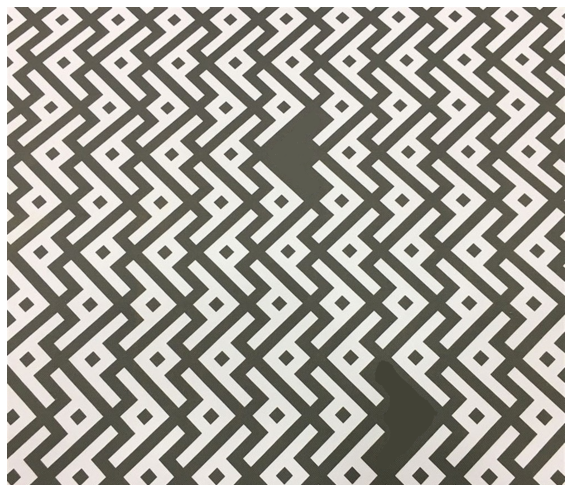

In [96]:
#haliImage = cv.imread("fabric2.png")
haliImage = cv.imread("fabric3.png")

fig = plt.figure(figsize=(10, 10))
haliImageGRAYFigure = fig.add_subplot(1,1,1)
haliImageGRAYFigure.axis("off")
haliImageGRAYFigure.imshow(cv.cvtColor(haliImage, cv.COLOR_BGR2RGB)) 

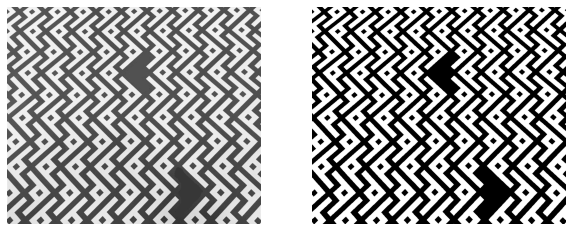

In [97]:
haliImageGRAY = cv.cvtColor(haliImage, cv.COLOR_BGR2GRAY)
# 3 kanallı görsel Gri görsele dönüştürüldü.

(thresh, haliImageBW) = cv.threshold(
    haliImageGRAY, 120, 255, 0)

haliImageBW = 255-haliImageBW

fig = plt.figure(figsize=(10, 10))
haliImageGRAYFigure = fig.add_subplot(1, 2, 1)
haliImageGRAYFigure.axis("off")
haliImageGRAYFigure.imshow(haliImageGRAY, cmap='gray')
haliImageBWFigure = fig.add_subplot(1, 2, 2)
haliImageBWFigure.axis("off")
haliImageBWFigure.imshow(haliImageBW, cmap='Greys')


In [98]:
kernelDisk = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

imgEros = cv.erode(haliImageBW, kernelDisk, iterations=12)
imgDil = cv.dilate(imgEros, kernelDisk, iterations=12)


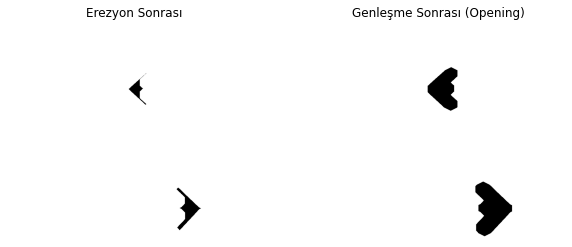

In [99]:
fig = plt.figure(figsize=(10, 10))
imgErosFigure = fig.add_subplot(1, 2, 1)
imgErosFigure.axis("off")
imgErosFigure.set_title("Erezyon Sonrası")
# imshow için gray yazmamın sebebi haliImageGRAY nesnesi tek kanallı bir gri nesne. ancak matplotlib bunu 3 kanallı nesneye çevirmektedir.
imgErosFigure.imshow(imgEros, cmap='Greys')
imgDilFigure = fig.add_subplot(1, 2, 2)
imgDilFigure.axis("off")

imgDilFigure.set_title("Genleşme Sonrası (Opening)")
imgDilFigure.imshow(imgDil, cmap='Greys')


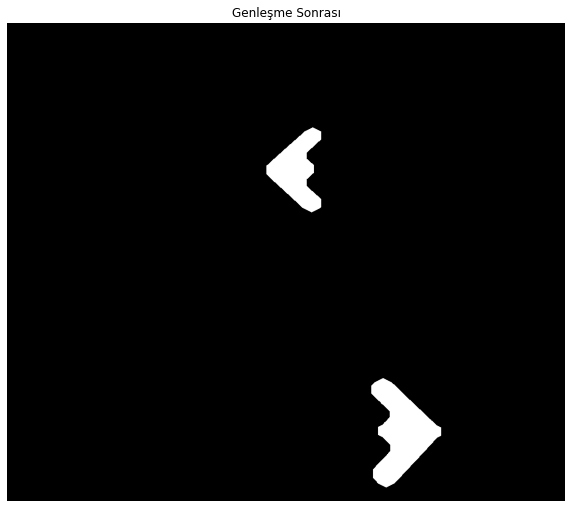

In [100]:
haliSelectErrorDilation = 255-imgDil
imgDilation = cv.dilate(haliSelectErrorDilation, kernelDisk, iterations=5)

fig = plt.figure(figsize=(10, 10))
imgDilFigure = fig.add_subplot(1, 1, 1)
imgDilFigure.axis("off")

imgDilFigure.set_title("Genleşme Sonrası")
imgDilFigure.imshow(imgDilation, cmap='Greys')


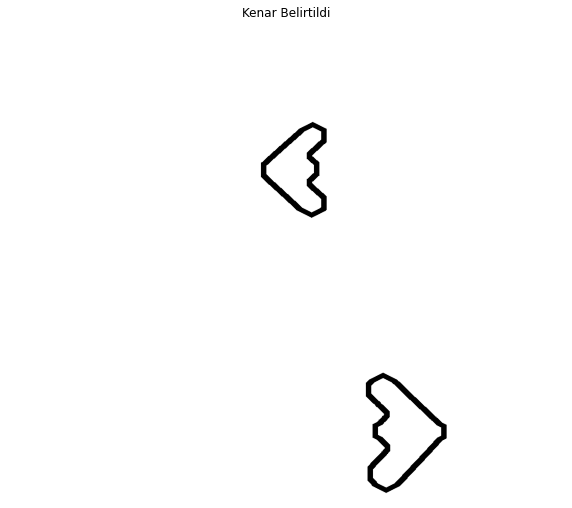

In [101]:
contours = imgDilation - haliSelectErrorDilation

fig = plt.figure(figsize=(10, 10))
imgDilFigure = fig.add_subplot(1, 1, 1)
imgDilFigure.axis("off")

imgDilFigure.set_title("Kenar Belirtildi")
imgDilFigure.imshow(contours, cmap='Greys')

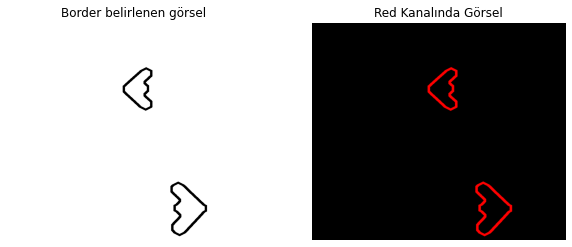

In [102]:
img2 = np.zeros_like(haliImage)
img2[:, :, 0] = 0
img2[:, :, 1] = 0
img2[:, :, 2] = contours


fig = plt.figure(figsize=(10, 10))
img_contoursFigure = fig.add_subplot(1, 2, 1)
img_contoursFigure.axis("off")
img_contoursFigure.set_title("Border belirlenen görsel")
img_contoursFigure.imshow(contours, cmap='Greys')

img2Figure = fig.add_subplot(1, 2, 2)
img2Figure.axis("off")
img2Figure.set_title("Red Kanalında Görsel")
img2Figure.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))



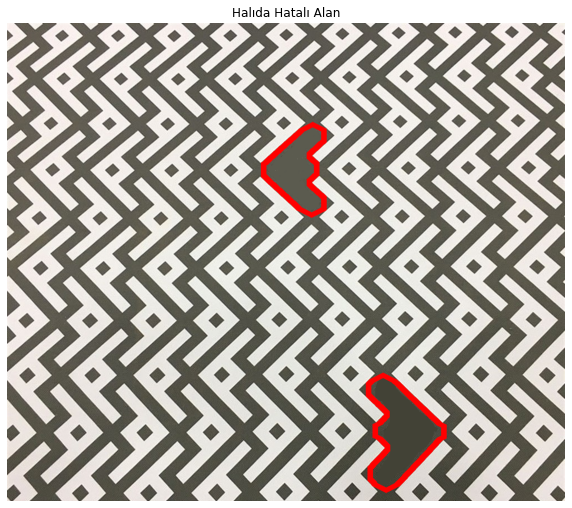

In [103]:
rows, cols, channels = img2.shape
roi = haliImage[0:rows, 0:cols]


img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

img2_fg = cv.bitwise_and(img2, img2, mask=mask)

dst = cv.add(img1_bg, img2_fg)
haliImage[0:rows, 0:cols] = dst

fig = plt.figure(figsize=(10, 10))
lastImageFigure = fig.add_subplot(1, 1, 1)
lastImageFigure.axis("off")
lastImageFigure.set_title("Halıda Hatalı Alan")
lastImageFigure.imshow(cv.cvtColor(haliImage, cv.COLOR_BGR2RGB))
